In [3]:
import pandas as pd

In [ ]:


file_path = '/content/hasil_dummy_v2.csv'
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9474 non-null   int64  
 1   date_in              9474 non-null   object 
 2   date_out             9474 non-null   object 
 3   branch               9474 non-null   object 
 4   hospital_care        9474 non-null   object 
 5   drug_quantity        9474 non-null   int64  
 6   admin_price          9474 non-null   int64  
 7   cogs                 9474 non-null   int64  
 8   payment              9474 non-null   object 
 9   review               9474 non-null   object 
 10  patient_id           9474 non-null   int64  
 11  room_id              9474 non-null   int64  
 12  drug_id              9474 non-null   int64  
 13  doctor_id            9474 non-null   int64  
 14  surgery_id           9474 non-null   int64  
 15  lab_id               9474 non-null   i

In [ ]:
data.head()

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD
0,30591,2020-01-01,2020-01-03,RSMD,Rawat Inap,4,50000,13719597,Asuransi,Netral,...,900000.0,600000,240000.0,15000000,90000,495000.0,17535000,3815403,2024-05-02 09:28:45.585259,False
1,46456,2020-01-01,2020-01-05,RSMA,Rawat Inap,1,50000,14625784,Pribadi,Sangat Tidak Puas,...,1500000.0,1250000,550000.0,15000000,200000,825000.0,19485000,4859216,2024-05-02 09:28:45.585265,False
2,99188,2020-01-01,2020-01-01,RSMD,Rawat Jalan,5,50000,3859519,Pribadi,Sangat Puas,...,300000.0,0,0.0,0,90000,0.0,990000,-2869519,2024-05-02 09:28:45.585267,False
3,23001,2020-01-01,2020-01-05,RSMA,Rawat Inap,2,50000,6086762,Asuransi,Netral,...,1500000.0,1500000,750000.0,4000000,150000,825000.0,8925000,2838238,2024-05-02 09:28:45.585268,False
4,29319,2020-01-01,2020-01-02,RSMS,Rawat Inap,3,50000,3003078,Asuransi,Sangat Tidak Puas,...,600000.0,600000,300000.0,0,200000,330000.0,2305000,-698078,2024-05-02 09:28:45.585268,False


In [ ]:
data['date_in'] = pd.to_datetime(data['date_in'])
data['date_out'] = pd.to_datetime(data['date_out'])

In [ ]:
currency_fields = [
    'admin_price', 'cogs', 'doctor_price', 'room_price', 'drug_price', 'surgery_price',
    'lab_price', 'food_price', 'total_amount', 'drug_price_total', 'doctor_visit_price',
    'room_price_total', 'food_price_total', 'surgery_price_total', 'lab_price_total',
    'infus_price_total','revenue'
]

data_types_before = data[currency_fields].dtypes
data[currency_fields] = data[currency_fields].astype(float)
data_types_after = data[currency_fields].dtypes

print("Data types before conversion:")
print(data_types_before)
print("\nData types after conversion:")
print(data_types_after)

Data types before conversion:
admin_price              int64
cogs                     int64
doctor_price             int64
room_price             float64
drug_price               int64
surgery_price          float64
lab_price              float64
food_price             float64
total_amount             int64
drug_price_total         int64
doctor_visit_price     float64
room_price_total         int64
food_price_total       float64
surgery_price_total      int64
lab_price_total          int64
infus_price_total      float64
revenue                  int64
dtype: object

Data types after conversion:
admin_price            float64
cogs                   float64
doctor_price           float64
room_price             float64
drug_price             float64
surgery_price          float64
lab_price              float64
food_price             float64
total_amount           float64
drug_price_total       float64
doctor_visit_price     float64
room_price_total       float64
food_price_total       floa

In [ ]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

room_type        1573
food_price       1573
room_price       1573
surgery          3573
surgery_price    3573
lab              1620
lab_price        1620
dtype: int64

In [ ]:
data['room_type'].fillna('No_Room', inplace=True)
data['surgery'].fillna('No_Surgery', inplace=True)
data['lab'].fillna('No_Lab', inplace=True)

price_fields = ['food_price', 'room_price', 'surgery_price', 'lab_price']
for field in price_fields:
    data[field].fillna(0.0, inplace=True)

data[['room_type', 'food_price', 'room_price', 'surgery', 'surgery_price', 'lab', 'lab_price']].head()

,room_type,food_price,room_price,surgery,surgery_price,lab,lab_price
0,Kelas 2,80000.0,200000.0,Kusus,15000000.0,Hematologi,90000.0
1,Kelas 1,110000.0,250000.0,Kusus,15000000.0,Serologi,200000.0
2,No_Room,0.0,0.0,No_Surgery,0.0,Hematologi,90000.0
3,VIP,150000.0,300000.0,Kecil,4000000.0,Rontgen,150000.0
4,VIP,150000.0,300000.0,No_Surgery,0.0,Serologi,200000.0


In [ ]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

In [ ]:
total_revenue = data['revenue'].sum()
total_revenue

8965933189.0

In [ ]:
data.to_csv("CleanedTransformedFilled_data.csv", index=False)

## Rangkuman Proses Pembersihan, Transformasi, dan Analisis Data

Langkah-langkah yang telah dilakukan dalam proses pembersihan, transformasi, dan analisis data adalah sebagai berikut:

1. **Pemuatan Data**
   - Memuat data dari file CSV bernama 'hasil_dummy_v2.csv' ke dalam DataFrame pandas yang disebut 'data'.
   - Mengonversi kolom 'date_in' dan 'date_out' ke format datetime menggunakan `pd.to_datetime()`.

2. **Pendefinisian Kolom Currency**
   - Mendefinisikan sebuah list bernama 'currency_fields' yang berisi nama-nama kolom yang mewakili nilai currency.
   - Memeriksa tipe data dari kolom-kolom tersebut sebelum dan sesudah mengonversinya ke tipe data float.

3. **Identifikasi dan Penanganan Missing Data**
   - Mengidentifikasi kolom-kolom dengan nilai yang hilang menggunakan `data.isnull().sum()` dan menyimpan hasilnya dalam variabel 'missing_data'.
   - Mengisi nilai yang hilang pada kolom 'room_type', 'surgery', dan 'lab' masing-masing dengan 'No_Room', 'No_Surgery', dan 'No_Lab' menggunakan `data['column_name'].fillna()`.
   - Mengisi nilai yang hilang pada kolom 'food_price', 'room_price', 'surgery_price', dan 'lab_price' dengan 0.0 menggunakan loop `for` dan `data[field].fillna(0.0, inplace=True)`.
   - Memeriksa bagian awal DataFrame untuk memverifikasi perubahan yang dilakukan pada kolom-kolom tersebut.

4. **Pengecekan Kembali Missing Data**
   - Memeriksa kembali apakah masih ada nilai yang hilang menggunakan `data.isnull().sum()` dan menyimpan hasilnya dalam variabel 'missing_data'.

5. **Kalkulasi Total Pendapatan**
   - Menghitung total pendapatan dengan menjumlahkan nilai-nilai pada kolom 'revenue' menggunakan `data['revenue'].sum()` dan menyimpan hasilnya dalam variabel 'total_revenue'.

6. **Penyimpanan Data yang Telah Dibersihkan**
   - Menyimpan data yang telah dibersihkan dan diubah ke dalam file CSV baru bernama "CleanedTransformedFilled_data.csv" menggunakan `data.to_csv()`.

Proses yang telah dilakukan meliputi pemeriksaan data, konversi tipe data, penanganan missing data, kalkulasi, dan penyimpanan data yang telah dibersihkan dan diubah ke dalam file CSV baru dengan nama "CleanedTransformedFilled_data.csv".

##ML tanpa EDA dan kolom spekulasi

In [4]:
file_path_2 = '/content/CleanedTransformedFilled_data.csv'
data_c = pd.read_csv(file_path_2)

In [ ]:
data_c.describe()

,id,drug_quantity,admin_price,cogs,patient_id,room_id,drug_id,doctor_id,surgery_id,lab_id,...,drug_price_total,days_diff,doctor_visit_price,room_price_total,food_price_total,surgery_price_total,lab_price_total,infus_price_total,total_amount,revenue
count,9474.000000,9474.000000,9474.0,9.474000e+03,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000,...,9474.000000,9474.000000,9.474000e+03,9.474000e+03,9474.000000,9.474000e+03,9474.000000,9474.000000,9.474000e+03,9.474000e+03
mean,55248.223137,2.988600,50000.0,7.620927e+06,4737.500000,2.101119,6.530716,3.010661,1.239814,2.483323,...,206276.124129,3.338400,1.015870e+06,7.472609e+05,323113.785096,5.555204e+06,118739.180916,550835.972134,8.567299e+06,9.463725e+05
std,25759.764978,1.411852,0.0,4.879623e+06,2735.052559,1.377272,3.442636,1.416523,1.156093,1.711970,...,133173.520244,1.971642,5.012932e+05,4.917391e+05,238770.811460,5.632277e+06,71016.554775,325320.989704,6.259934e+06,2.319117e+06
min,10001.000000,1.000000,50000.0,1.000452e+06,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,40000.000000,0.000000,2.500000e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,3.400000e+05,-4.579823e+06
25%,33103.000000,2.000000,50000.0,3.642624e+06,2369.250000,1.000000,4.000000,2.000000,0.000000,1.000000,...,100000.000000,2.000000,6.000000e+05,4.000000e+05,150000.000000,0.000000e+00,80000.000000,330000.000000,3.030000e+06,-7.092005e+05
50%,55447.000000,3.000000,50000.0,6.267770e+06,4737.500000,2.000000,7.000000,3.000000,1.000000,2.000000,...,160000.000000,3.000000,9.000000e+05,7.500000e+05,300000.000000,4.000000e+06,90000.000000,495000.000000,7.730000e+06,1.073649e+06
75%,77456.000000,4.000000,50000.0,1.109500e+07,7105.750000,3.000000,10.000000,4.000000,2.000000,4.000000,...,250000.000000,5.000000,1.500000e+06,1.200000e+06,480000.000000,8.000000e+06,195000.000000,825000.000000,1.246500e+07,2.615005e+06
max,99998.000000,5.000000,50000.0,1.749944e+07,9474.000000,4.000000,12.000000,5.000000,3.000000,5.000000,...,550000.000000,6.000000,1.800000e+06,1.800000e+06,900000.000000,1.500000e+07,200000.000000,990000.000000,2.129000e+07,7.465913e+06


In [ ]:
data['review'].value_counts()

review
Sangat Puas          1948
Sangat Tidak Puas    1909
Netral               1904
Puas                 1858
Tidak Puas           1855
Name: count, dtype: int64

## Machine Learning

In [ ]:
'''
Untuk hitung Revenue:

cogs (Cost of Goods Sold)
admin_price (Semua mah sama ini)
total_amount (sum of various charges)
room_price
drug_price
doctor_price
surgery_price
lab_price
'''

In [ ]:
ml_data = data_c.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

selected_features = ['cogs', 'admin_price', 'total_amount', 'room_price', 'drug_price', 'doctor_price', 'surgery_price', 'lab_price']
ml_data[selected_features] = scaler.fit_transform(ml_data[selected_features])

In [ ]:
ml_data[['cogs', 'admin_price', 'total_amount', 'room_price', 'drug_price', 'doctor_price', 'surgery_price', 'lab_price']].head(20)

,cogs,admin_price,total_amount,room_price,drug_price,doctor_price,surgery_price,lab_price
0,1.249890,0.0,1.432631,0.136820,-1.069061,0.504647,1.676994,-0.404704
1,1.435608,0.0,1.744152,0.647953,1.514826,0.504647,1.676994,1.144312
2,-0.770881,0.0,-1.210508,-1.907712,1.514826,0.504647,-0.986368,-0.404704
3,-0.314419,0.0,0.057144,1.159086,0.222883,0.504647,-0.276138,0.440214
4,-0.946404,0.0,-1.000431,1.159086,0.222883,0.504647,-0.986368,1.144312
5,-0.876250,0.0,-1.276806,-1.907712,0.222883,0.504647,-0.986368,0.440214
6,-0.596311,0.0,-1.077912,0.136820,-1.069061,0.504647,-0.986368,-0.545524
7,-1.127908,0.0,-1.228081,-1.907712,1.514826,0.504647,-0.986368,1.144312
8,0.286637,0.0,0.304764,0.136820,-0.699934,0.504647,0.434092,-0.404704
9,-1.338328,0.0,-1.274410,-1.907712,-0.699934,0.504647,-0.986368,-0.404704


In [ ]:
from sklearn.model_selection import train_test_split

X = ml_data[selected_features]
y = ml_data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 8.911746724783157e-18
R2 Score: 1.0


In [ ]:
coefficients = model.coef_
intercept = model.intercept_

equation = "revenue = "
for i, feature in enumerate(selected_features):
    coefficient = coefficients[i]
    equation += f"{coefficient:.2f} * {feature}"
    if i < len(selected_features) - 1:
        equation += " + "
equation += f" + {intercept:.2f}"

print("Equation:", equation)

Equation: revenue = -4879365.25 * cogs + 0.00 * admin_price + 6259603.73 * total_amount + 0.00 * room_price + 0.00 * drug_price + -0.00 * doctor_price + 0.00 * surgery_price + -0.00 * lab_price + 946372.51


# Regresi linear 2 (lebih sedikit feature dan 0.3)

In [ ]:
ml_data_v2 = data_c.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

selected_features = ['cogs', 'room_price_total', 'drug_price_total', 'doctor_visit_price', 'surgery_price_total', 'lab_price_total','infus_price_total','food_price_total']
ml_data_v2[selected_features] = scaler.fit_transform(ml_data_v2[selected_features])

In [ ]:
ml_data_v2[['cogs', 'room_price_total', 'drug_price_total', 'doctor_visit_price', 'surgery_price_total', 'lab_price_total','infus_price_total','food_price_total']].head(20)

,cogs,room_price_total,drug_price_total,doctor_visit_price,surgery_price_total,lab_price_total,infus_price_total,food_price_total
0,1.249890,-0.299485,-0.347506,-0.231154,1.676994,-0.404704,-0.171643,-0.348109
1,1.435608,1.022423,-0.722976,0.965814,1.676994,1.144312,0.842794,0.950276
2,-0.770881,-1.519709,2.581159,-1.428121,-0.986368,-0.404704,-1.693297,-1.353310
3,-0.314419,1.530850,-0.422600,0.965814,-0.276138,0.440214,0.842794,1.787944
4,-0.946404,-0.299485,0.140605,-0.829638,-0.986368,1.144312,-0.678861,-0.096808
5,-0.876250,-1.519709,-0.985804,-1.428121,-0.986368,0.440214,-1.693297,-1.353310
6,-0.596311,-0.706227,-0.047130,-0.829638,-0.986368,-0.545524,-0.678861,-0.683176
7,-1.127908,-1.519709,0.929092,-1.428121,-0.986368,1.144312,-1.693297,-1.353310
8,0.286637,-0.299485,-0.798070,-0.231154,0.434092,-0.404704,-0.171643,-0.348109
9,-1.338328,-1.519709,-0.422600,-1.428121,-0.986368,-0.404704,-1.693297,-1.353310


In [ ]:
from sklearn.model_selection import train_test_split

X = ml_data_v2[selected_features]
y = ml_data_v2['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.8150494111437948e-18
R2 Score: 1.0


In [ ]:
coefficients = model.coef_
intercept = model.intercept_

equation = "revenue = "
for i, feature in enumerate(selected_features):
    coefficient = coefficients[i]
    equation += f"{coefficient:.2f} * {feature}"
    if i < len(selected_features) - 1:
        equation += " + "
equation += f" + {intercept:.2f}"

print("Equation:", equation)

Equation: revenue = -4879365.25 * cogs + 491713.20 * room_price_total + 133166.49 * drug_price_total + 501266.76 * doctor_visit_price + 5631979.44 * surgery_price_total + 71012.81 * lab_price_total + 325303.82 * infus_price_total + 238758.21 * food_price_total + 946372.51


Karena revenue itu hasil total_amount-COGS, sedangkan disini tidak pakai total amount tapi masing2 price dan kemungkinan ada sedikit pembulatan.

#Model lain

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB  # Importing GaussianNB for Naive Bayes
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor  # Importing RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regression": SVR(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    #"Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

In [ ]:
from sklearn.model_selection import cross_val_score

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    results[name] = scores
    print(f"{name} Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Linear Regression Accuracy: 1.0 (+/- 0.0)
K-Nearest Neighbors Accuracy: 0.8799803316014809 (+/- 0.005461555529644421)
Support Vector Regression Accuracy: -0.002946467934256747 (+/- 0.0033182837615777115)
AdaBoost Accuracy: 0.8243574734789914 (+/- 0.01300746965206894)
Gradient Boosting Accuracy: 0.9912343274583699 (+/- 0.001080145473514631)
Random Forest Accuracy: 0.9967133021656445 (+/- 0.0005063992130149139)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Best parameters for K-Nearest Neighbors: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9052058378975062


In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
final_score = r2_score(y_test, predictions)
print(f"Test score: {final_score}")

Test score: 0.9212313467860278


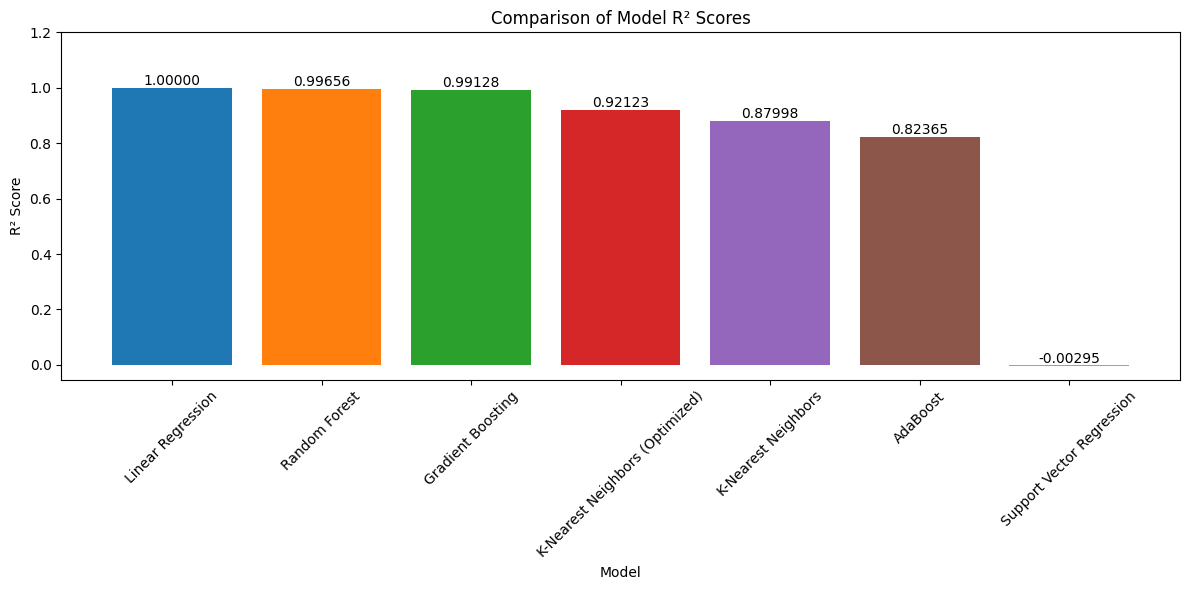

In [ ]:
import matplotlib.pyplot as plt

results = {
    "Linear Regression": 1.0,
    "K-Nearest Neighbors": 0.87998,
    "Support Vector Regression": -0.00295,
    "AdaBoost": 0.82365,
    "Gradient Boosting": 0.99128,
    "Random Forest": 0.99656,
    "K-Nearest Neighbors (Optimized)": 0.92123  # Test score setelah di optimalkan keknya
}

model_names = list(results.keys())
r2_scores = list(results.values())
sorted_indices = sorted(range(len(r2_scores)), key=lambda k: r2_scores[k], reverse=True)
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_r2_scores = [r2_scores[i] for i in sorted_indices]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_model_names, sorted_r2_scores, color=colors)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{sorted_r2_scores[i]:.5f}',
             ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Model R² Scores')
plt.xticks(rotation=45)
plt.ylim(top=1.2)
plt.tight_layout()
plt.show()

Berdasarkan hasil cross-validation, Random forest, Linear Regression dan Gradient Boosting menunjukkan akurasi tertinggi dan variansi terkecil di antara prediksi, yang menunjukkan bahwa ketiganya sangat efektif dalam mempelajari dan memprediksi dataset ini. Namun, mengingat potensi masalah data leakage (seharusnya tidak sih) dengan Linear Regression, Gradient Boosting dan RF mungkin menawarkan alternatif yang lebih ok
.

Parameternya?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search_gb.best_score_))

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
Best cross-validation score: 0.999


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search_rf.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.997


**Best parameters for Gradient Boosting:**

learning_rate: 0.1

max_depth: 5

min_samples_leaf: 2

min_samples_split: 2

n_estimators: 300

**Best parameters for Random Forest:**

max_depth: 30

max_features: 'auto' (default value)

min_samples_leaf: 2

min_samples_split: 2

n_estimators: 200

##Review rumah sakit

===================================================================================================================

In [ ]:
'''
Ini ordinal, tapi pakai regresi dan ambil yang terdekat nilainya atau klasifikasi?

"Sangat Tidak Puas" -> 0
"Tidak Puas" -> 1
"Netral" -> 2
"Puas" -> 3
"Sangat Puas" -> 4
'''

ml_review = data.copy()

review_mapping = {
    "Sangat Tidak Puas": 0,
    "Tidak Puas": 1,
    "Netral": 2,
    "Puas": 3,
    "Sangat Puas": 4
}
ml_review['review_ordinal'] = ml_review['review'].map(review_mapping)

In [ ]:
ml_review[['review_ordinal']].head()

,review_ordinal
0,2
1,0
2,4
3,2
4,0


## Kategorisasi feature untuk Kepuasan Pasien Rumah Sakit

**Dampak Tinggi:**
* **Tipe Kamar (room_type)**: Mempengaruhi kenyamanan. (Ordial)????
* **Jenis Perawatan (hospital_care)**: Rawat Inap vs. Rawat Jalan  memberikan level pelayanan dan perhatian berbeda.
* **Pembayaran (payment)**: Metode pembayaran (Asuransi/Pribadi) mempengaruhi transparansi biaya dan nilai yang dirasakan pasien.

**Dampak Sedang:**
* **Lama Inap**: Dihitung dari `date_in` dan `date_out`. Durasi yang tidak sesuai harapan dapat mempengaruhi persepsi efisiensi perawatan. Makin lama makin jele
* **Harga Admin (admin_price)**: Biaya administrasi tinggi dapat menurunkan kepuasan jika pasien merasa tidak wajar atau transparan. Tapi admin semua sama 50k jadi ini tidak perlu.

**Dampak Rendah:**
* **Jumlah Obat (drug_quantity)**: Jumlah obat bisa mempengaruhi persepsi kecukupan perawatan, tapi dampaknya mungkin dikit.
* **COGS**: Mencerminkan sumber daya yang dialokasikan. Ini metrik internal yang mungkin tidak dirasakan pasien. Karena semakin besar COGS ini berarti effort siloam makin besar ke si pasien.

**Dampak Tidak Signifikan:**
* **Jenis Kelamin (gender)** dan **Usia (age)**: Faktor demografi ini mempengaruhi persepsi layanan dan harapan, tetapi dampak langsungnya lebih kecil harusnya.

#plus
length of stay, payment, hospital care, room type, branch, and total amount

mugnkin juga doctor and surgery

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

ml_review['length_of_stay'] = (pd.to_datetime(ml_review['date_out']) - pd.to_datetime(ml_review['date_in'])).dt.days

categorical_features = ['branch', 'hospital_care', 'payment', 'gender', 'room_type']
ml_review = pd.get_dummies(ml_review, columns=categorical_features, drop_first=True)

numerical_features = ['drug_quantity', 'admin_price', 'cogs', 'age', 'length_of_stay']
scaler = StandardScaler()
ml_review[numerical_features] = scaler.fit_transform(ml_review[numerical_features])

X = ml_review.drop(['review', 'review_ordinal', 'date_in', 'date_out', 'patient_name', 'id', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id'], axis=1)
y = ml_review['review_ordinal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)


predictions = model.predict(X_test)
if isinstance(model, RandomForestRegressor):
    predictions = predictions.round()

ValueError: could not convert string to float: 'Holland & Barrett'

In [ ]:
#regress
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
predictions_rounded = predictions.round()

mse = mean_squared_error(y_test, predictions_rounded)
r2 = r2_score(y_test, predictions_rounded)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


In [ ]:
#classifi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


##EDA

In [ ]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9474 non-null   int64  
 1   date_in              9474 non-null   object 
 2   date_out             9474 non-null   object 
 3   branch               9474 non-null   object 
 4   hospital_care        9474 non-null   object 
 5   drug_quantity        9474 non-null   int64  
 6   admin_price          9474 non-null   float64
 7   cogs                 9474 non-null   float64
 8   payment              9474 non-null   object 
 9   review               9474 non-null   object 
 10  patient_id           9474 non-null   int64  
 11  room_id              9474 non-null   int64  
 12  drug_id              9474 non-null   int64  
 13  doctor_id            9474 non-null   int64  
 14  surgery_id           9474 non-null   int64  
 15  lab_id               9474 non-null   i

In [ ]:
df_EDA = data_c.copy()

In [ ]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9474 non-null   int64  
 1   date_in              9474 non-null   object 
 2   date_out             9474 non-null   object 
 3   branch               9474 non-null   object 
 4   hospital_care        9474 non-null   object 
 5   drug_quantity        9474 non-null   int64  
 6   admin_price          9474 non-null   float64
 7   cogs                 9474 non-null   float64
 8   payment              9474 non-null   object 
 9   review               9474 non-null   object 
 10  patient_id           9474 non-null   int64  
 11  room_id              9474 non-null   int64  
 12  drug_id              9474 non-null   int64  
 13  doctor_id            9474 non-null   int64  
 14  surgery_id           9474 non-null   int64  
 15  lab_id               9474 non-null   i

In [ ]:
numeric_columns = [
    'drug_quantity', 'cogs', 'patient_id', 'room_id', 'drug_id', 'doctor_id',
    'surgery_id', 'lab_id', 'age', 'food_price', 'room_price', 'drug_price', 'doctor_price',
    'surgery_price', 'lab_price', 'drug_price_total', 'days_diff', 'doctor_visit_price',
    'room_price_total', 'food_price_total', 'surgery_price_total', 'lab_price_total',
    'infus_price_total', 'total_amount', 'revenue'
]

data_c_numeric = data_c[numeric_columns]

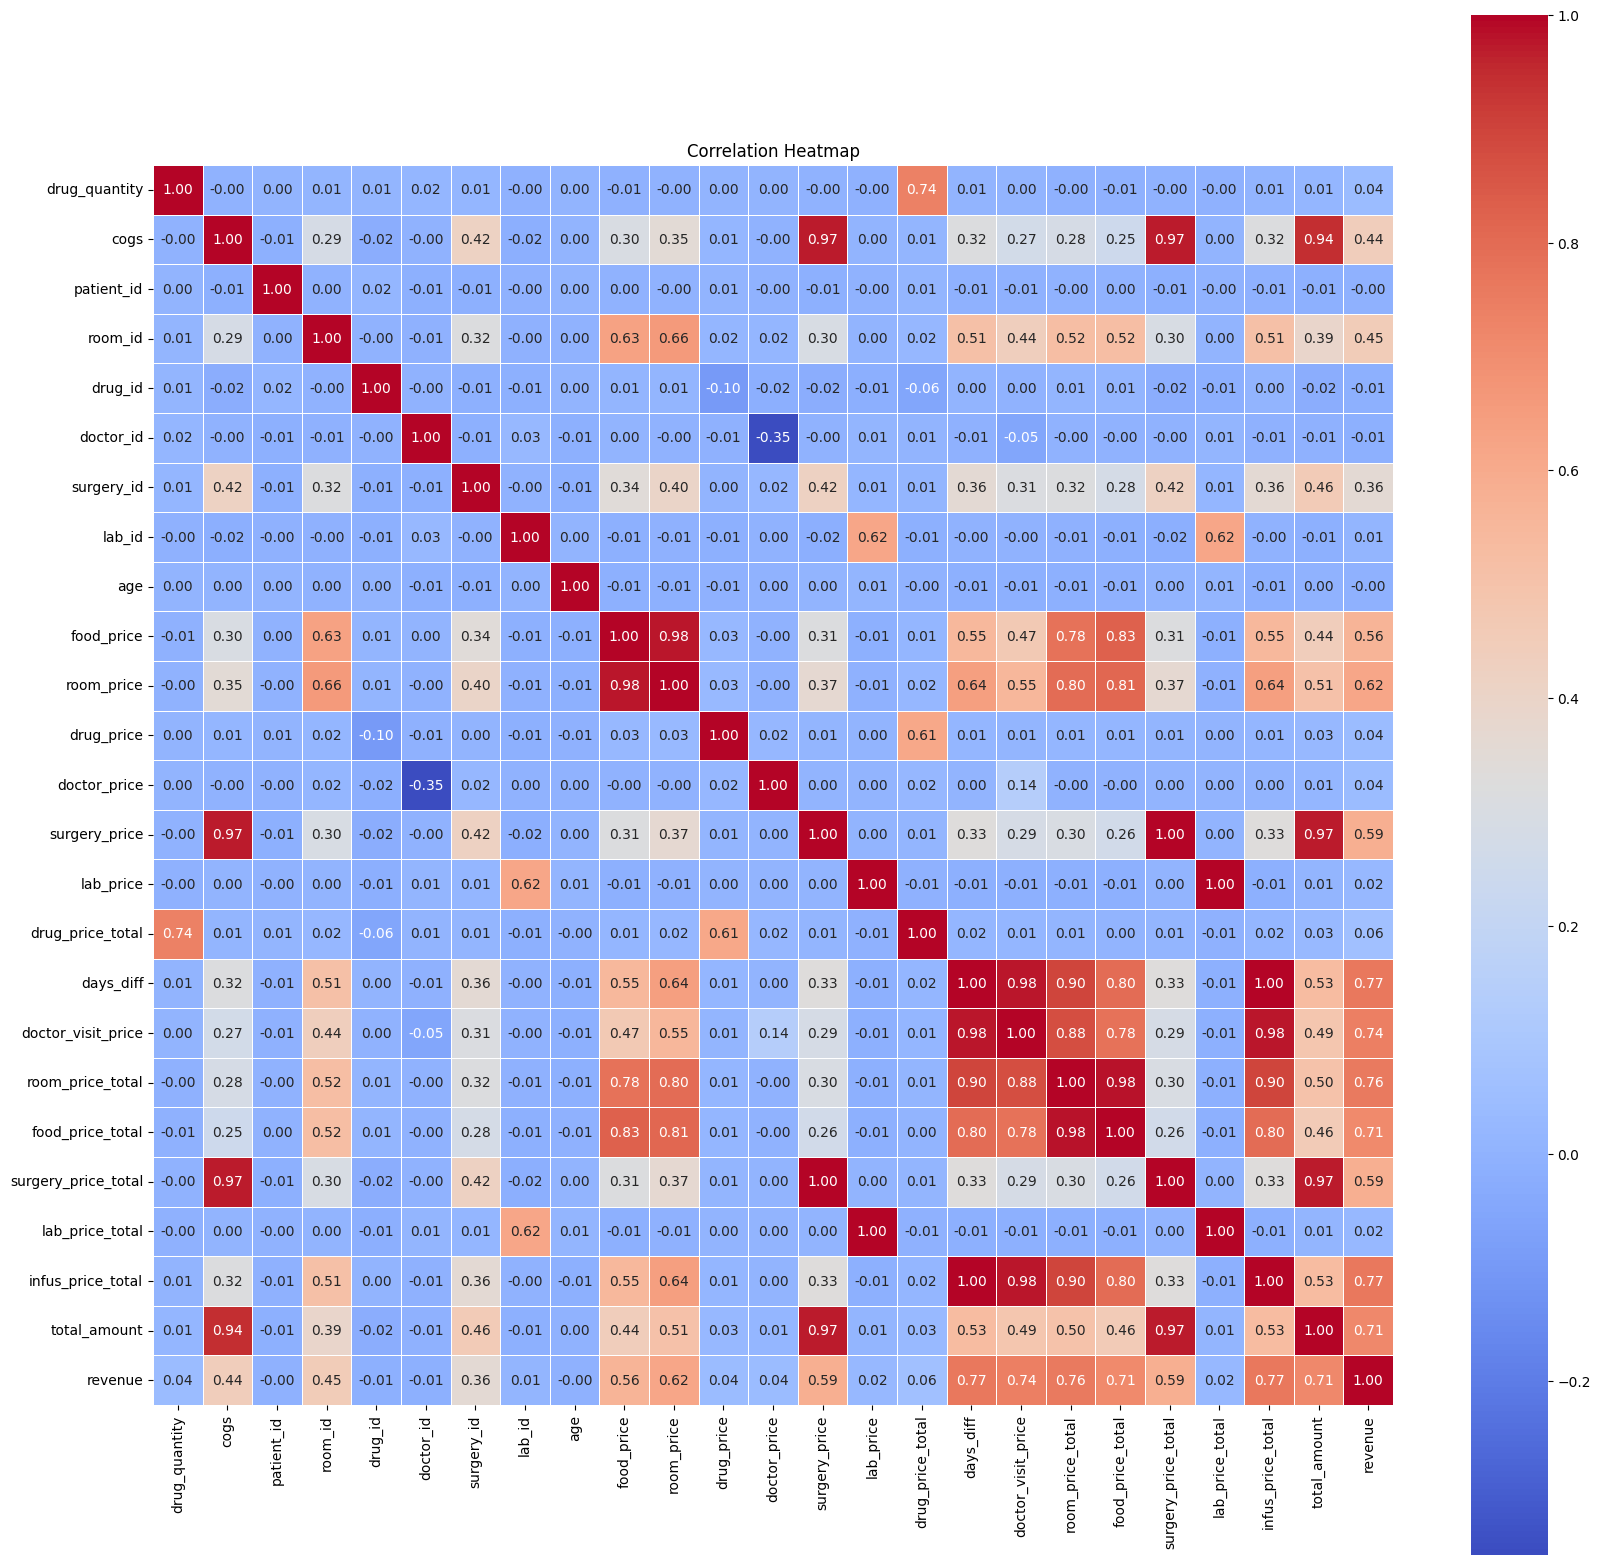

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_c_numeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = data_c_numeric.corr()
corr_df = pd.DataFrame(corr_matrix)
print(corr_df)

                     drug_quantity      cogs  patient_id   room_id   drug_id  \
drug_quantity             1.000000 -0.002212    0.004178  0.008356  0.007826   
cogs                     -0.002212  1.000000   -0.011340  0.285330 -0.020633   
patient_id                0.004178 -0.011340    1.000000  0.000132  0.017047   
room_id                   0.008356  0.285330    0.000132  1.000000 -0.000588   
drug_id                   0.007826 -0.020633    0.017047 -0.000588  1.000000   
doctor_id                 0.016529 -0.002276   -0.010229 -0.005585 -0.001745   
surgery_id                0.013316  0.415702   -0.013467  0.315330 -0.009437   
lab_id                   -0.004402 -0.017282   -0.004003 -0.003896 -0.012254   
age                       0.004650  0.002460    0.002344  0.000633  0.002552   
food_price               -0.006156  0.300346    0.000266  0.632807  0.011605   
room_price               -0.000455  0.354794   -0.002356  0.657601  0.009088   
drug_price                0.004617  0.01

In [ ]:
'''

from nbconvert import HTMLExporter
import codecs
import nbformat

notebook_name = '/content/revenue_prediction_checkpoint.py'
output_file_name = 'output.html'

# Load the notebook file
with open(notebook_name, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Configure the HTMLExporter
exporter = HTMLExporter()
exporter.template_file = 'full'  # Use the 'full' template for a complete HTML file

# Convert the notebook to HTML
output, resources = exporter.from_notebook_node(notebook)

# Write the HTML output to a file
with open(output_file_name, 'w', encoding='utf-8') as f:
    f.write(output)

print(f"Notebook converted successfully. Output saved as '{output_file_name}'.")

NotJSONError: Notebook does not appear to be JSON: '# -*- coding: utf-8 -*-\n"""revenue_pre...

In [5]:
df_rev = data_c.copy()

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

df_rev['created_at'] = pd.to_datetime(df_rev['created_at'])


In [7]:
cats = []
nums = []
temps = []

for column, dtype in df_rev.dtypes.items():
    if dtype == 'object' or dtype == 'bool':
        cats.append(column)
    elif dtype == 'int64' or dtype == 'float64':
        nums.append(column)
    elif dtype == 'datetime64[ns]':
        temps.append(column)

print("Categorical columns:", cats)
print("Numerical columns:", nums)
print("Temporal columns:", temps)

df_rev[nums].describe()

df_rev[cats].describe()

df_rev[temps].describe()


Categorical columns: ['date_in', 'date_out', 'branch', 'hospital_care', 'payment', 'review', 'patient_name', 'gender', 'room_type', 'drug_brand', 'drug_type', 'doctor', 'surgery', 'lab', 'is_DBD']
Numerical columns: ['id', 'drug_quantity', 'admin_price', 'cogs', 'patient_id', 'room_id', 'drug_id', 'doctor_id', 'surgery_id', 'lab_id', 'age', 'food_price', 'room_price', 'drug_price', 'doctor_price', 'surgery_price', 'lab_price', 'drug_price_total', 'days_diff', 'doctor_visit_price', 'room_price_total', 'food_price_total', 'surgery_price_total', 'lab_price_total', 'infus_price_total', 'total_amount', 'revenue']
Temporal columns: ['created_at']


,created_at
count,9474
mean,2024-05-02 09:28:45.587771392
min,2024-05-02 09:28:45.585259
25%,2024-05-02 09:28:45.586531072
50%,2024-05-02 09:28:45.587736064
75%,2024-05-02 09:28:45.589015808
max,2024-05-02 09:28:45.590324


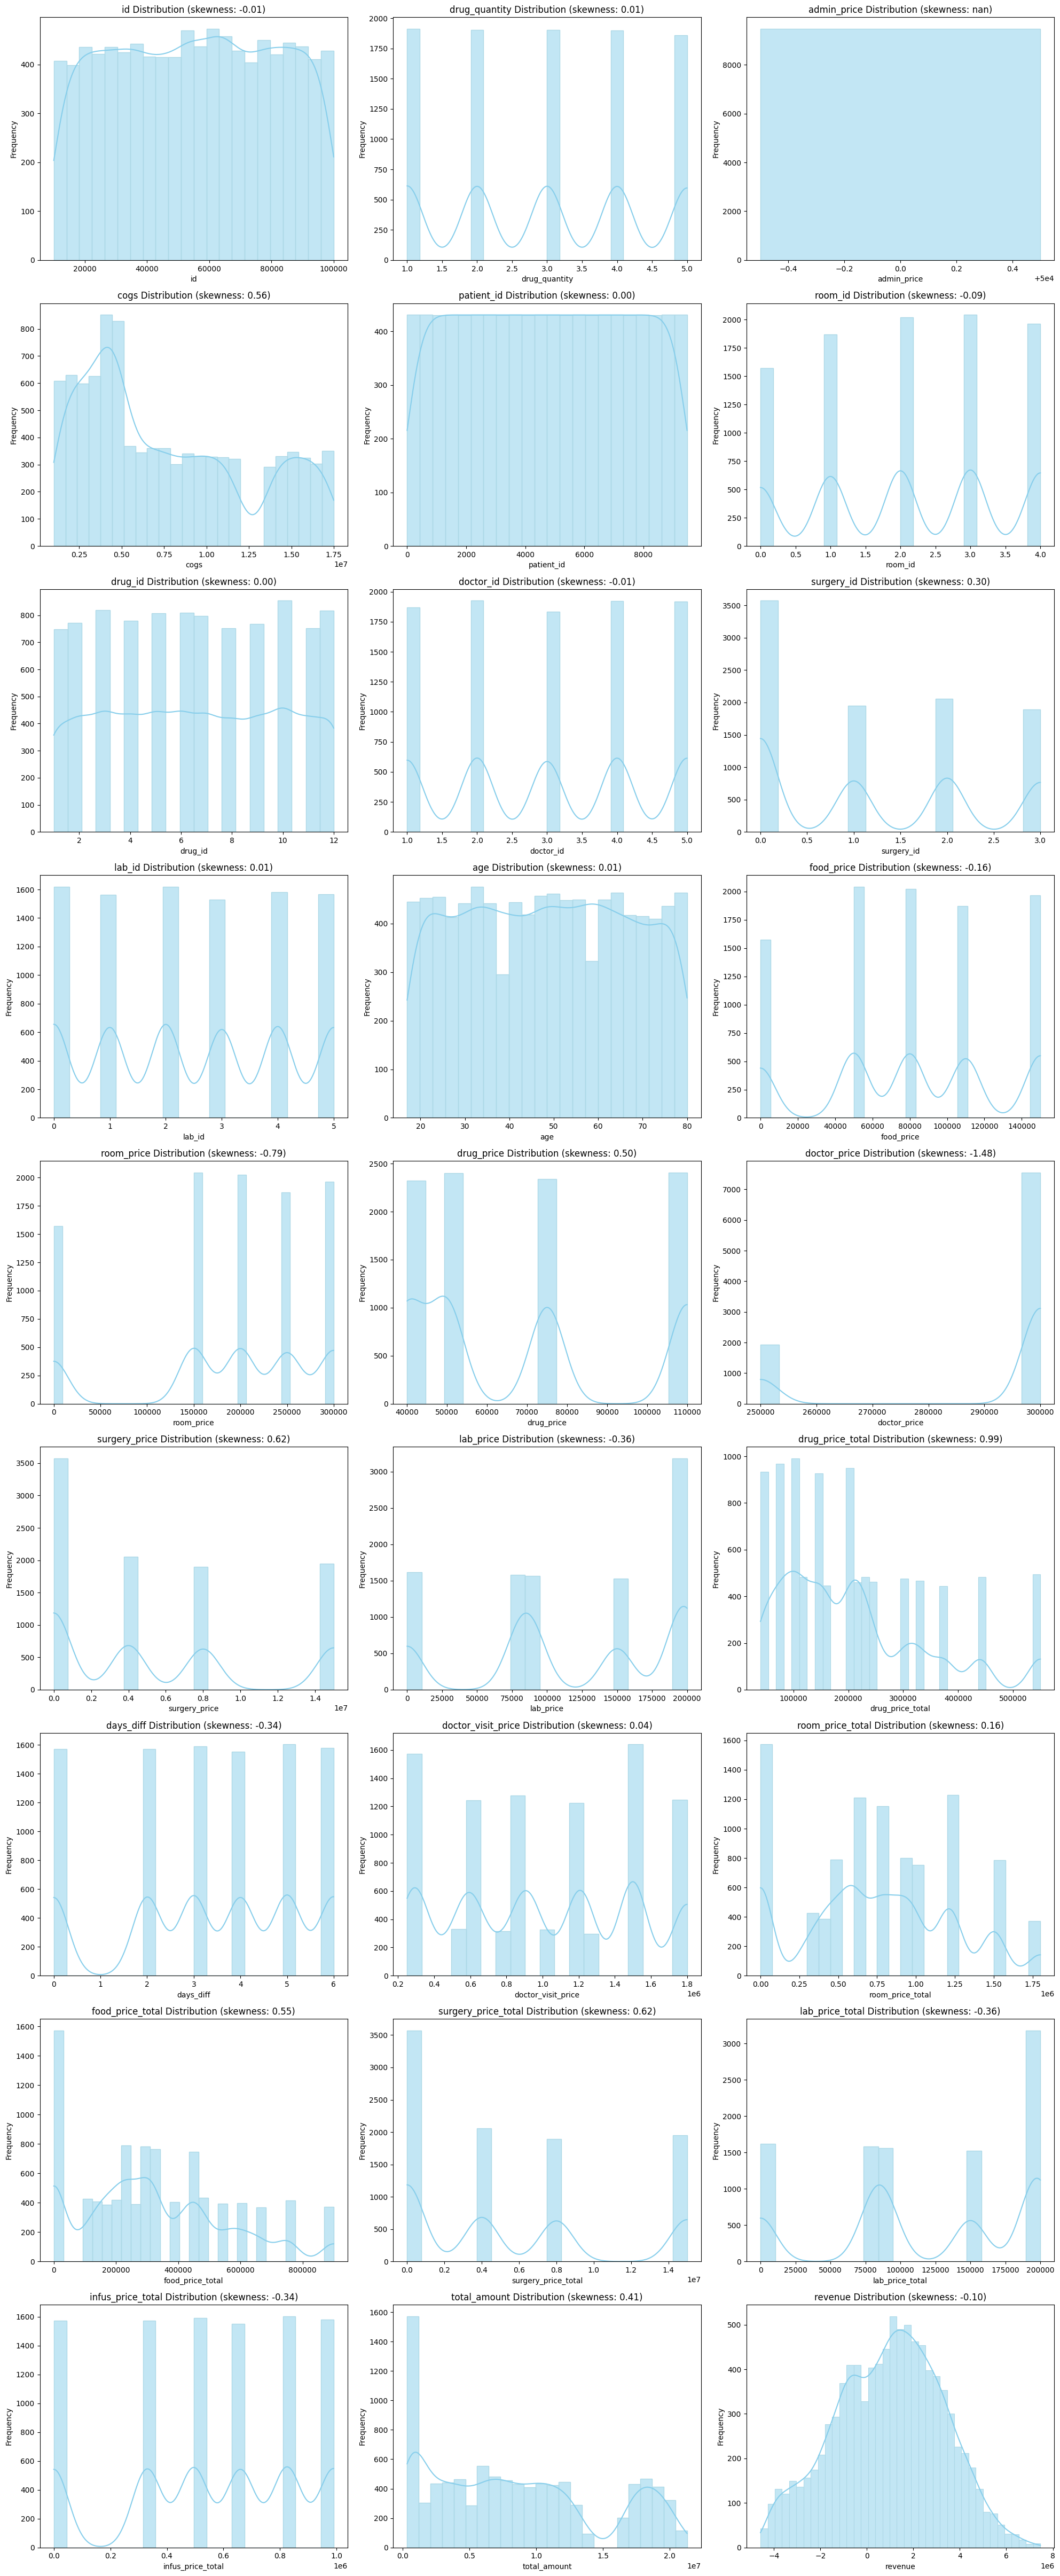

In [8]:
grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*4))

for i, column in enumerate(nums):
    ax = plt.subplot(grid[i])
    skewness = skew(df_rev[column])
    sns.histplot(data=df_rev, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=ax)
    ax.set_title(f'{column} Distribution (skewness: {skewness:.2f})')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


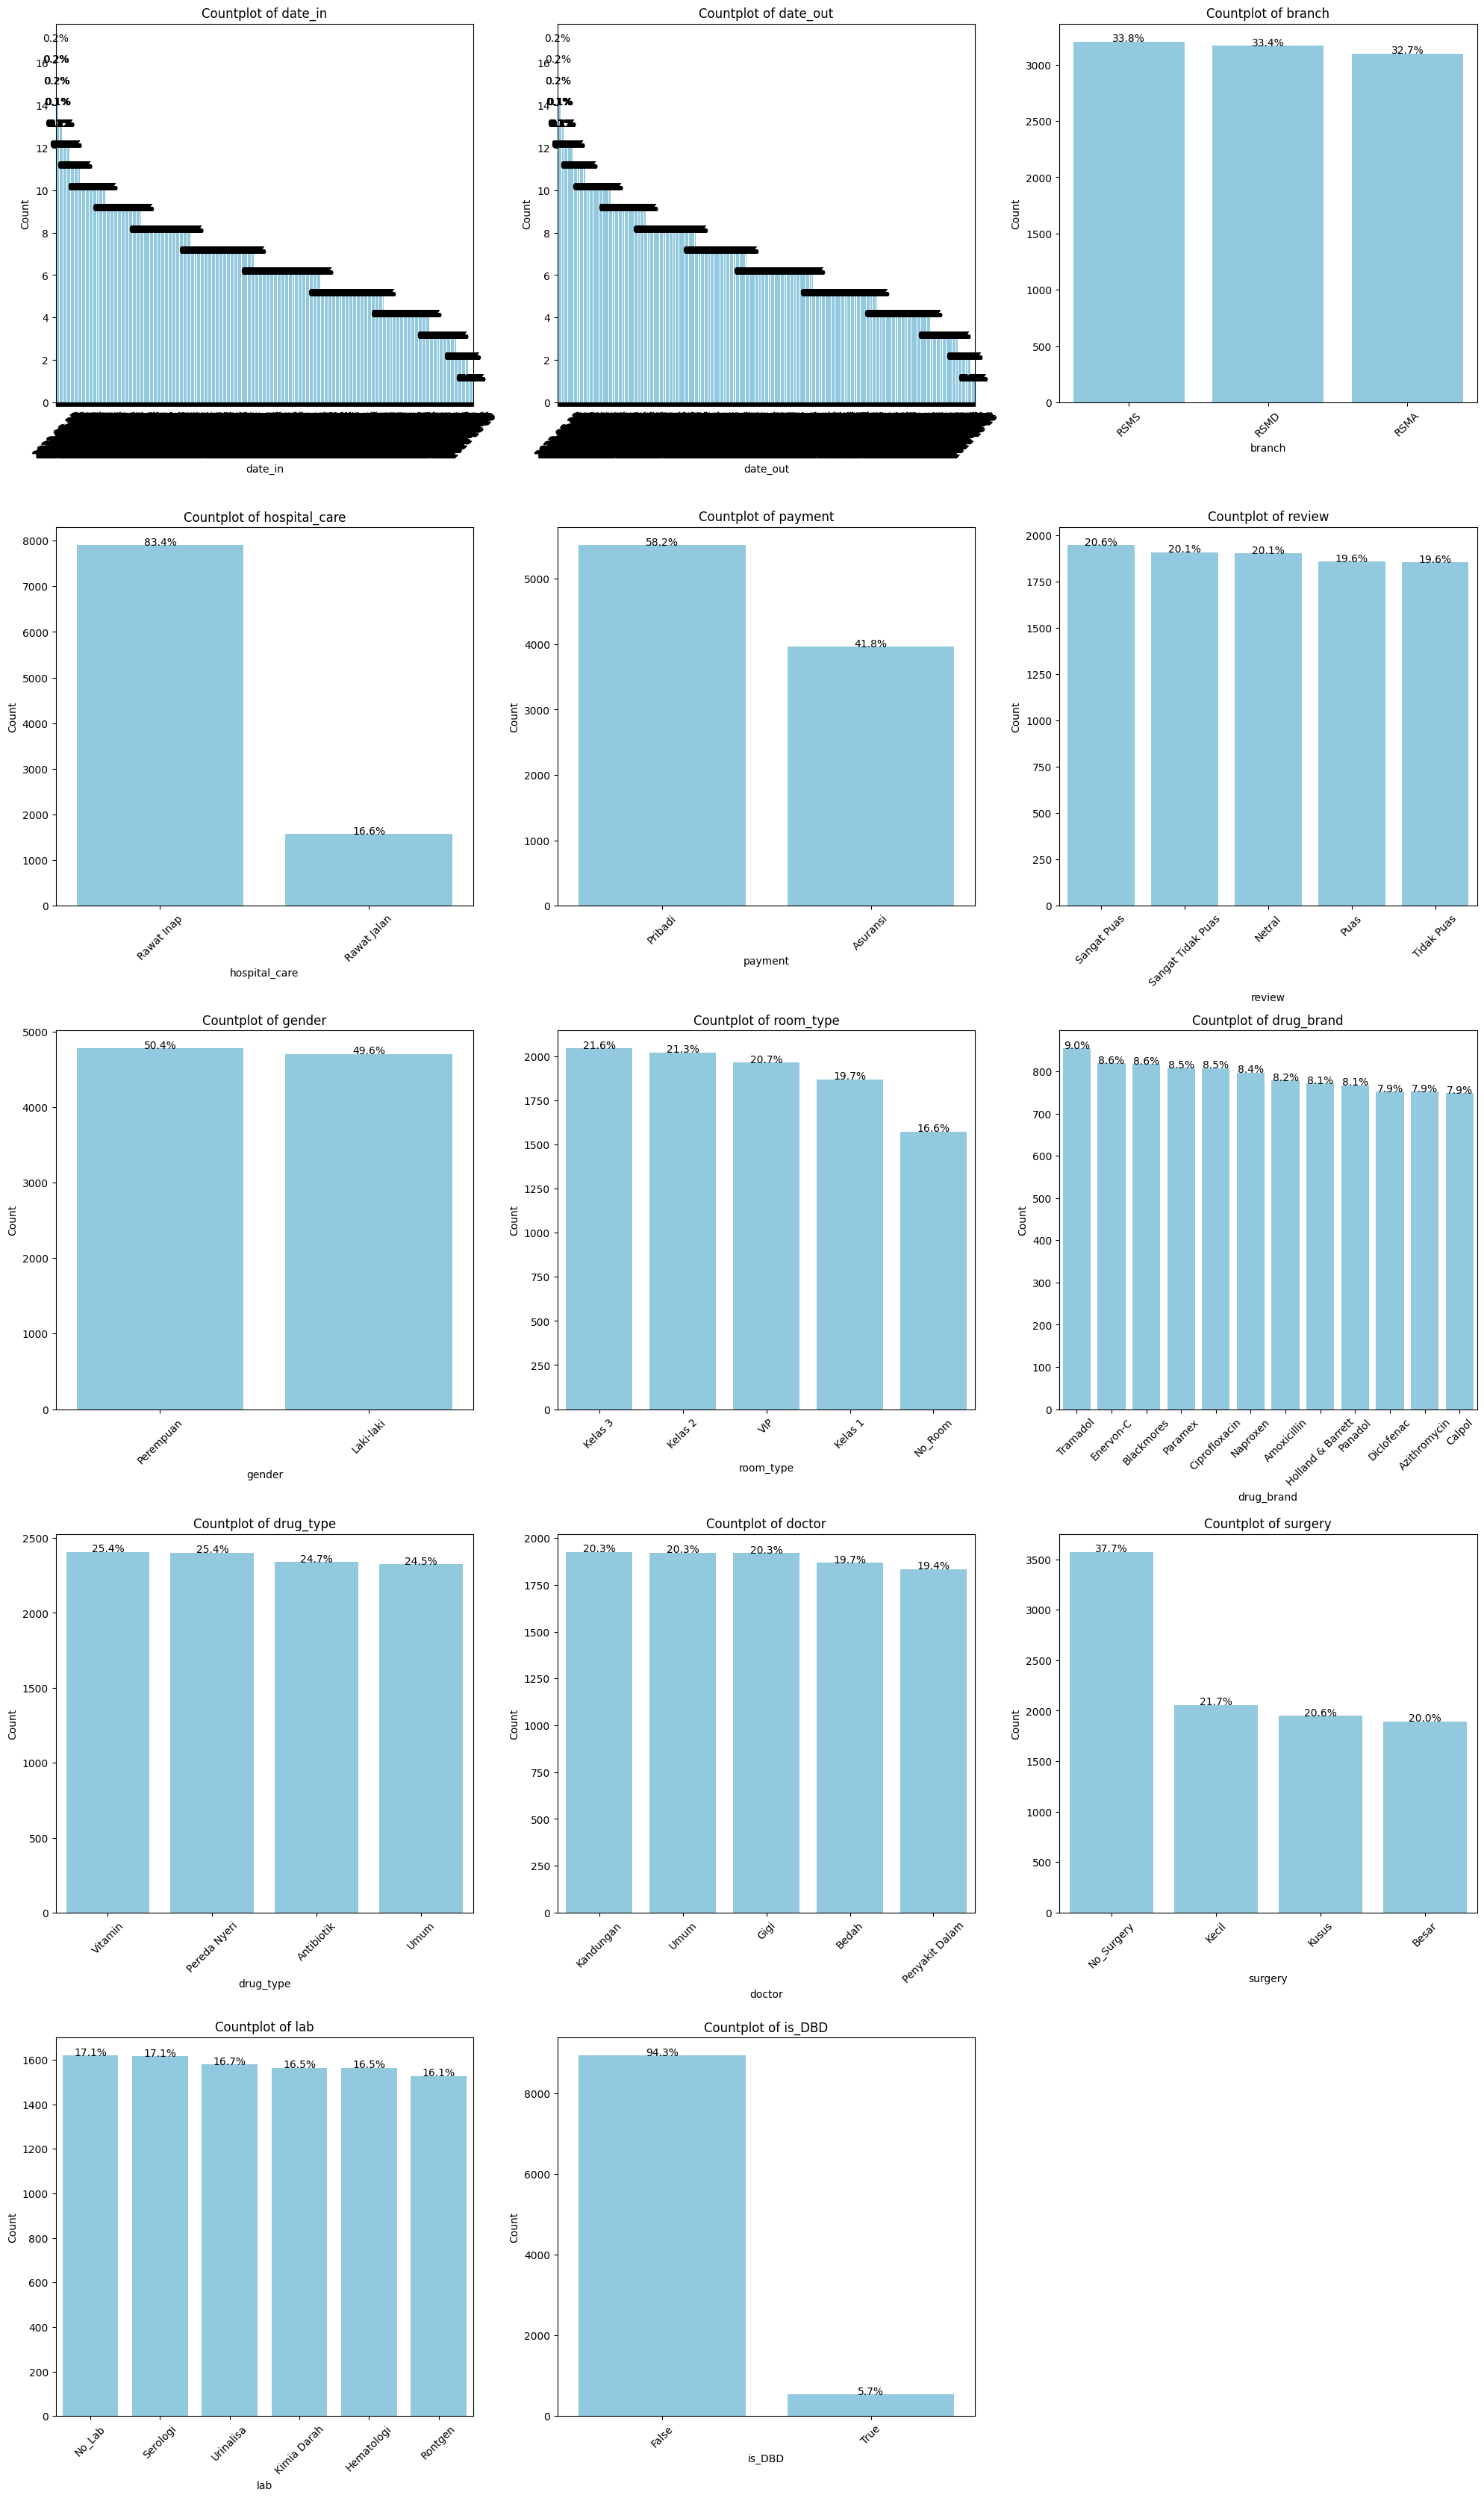

In [9]:

cat_cols = [col for col in cats if col != 'patient_name']

grid = gridspec.GridSpec(15, 3)
plt.figure(figsize=(20, 20*5))

for i, feature in enumerate(cat_cols):
    ax = plt.subplot(grid[i])
    sns.countplot(data=df_rev, x=feature, ax=ax, order=df_rev[feature].value_counts().index, color='skyblue')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Calculate percentages and annotate bars
    total = float(len(df_rev[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02
        ax.annotate(percentage, (x, y), ha='center')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [12]:
def map_age_to_group(age):
    if age <= 18:
        return '0-18'
    elif age <= 30:
        return '19-30'
    elif age <= 45:
        return '31-45'
    elif age <= 60:
        return '46-60'
    else:
        return '60+'

df_rev['age_group'] = df_rev['age'].apply(map_age_to_group)

age_mapping = {'0-18': 0, '19-30': 1, '31-45': 2, '46-60': 3, '60+': 4}

df_rev['age_group_encoded'] = df_rev['age_group'].replace(age_mapping).astype(int)

df_rev[['age_group', 'age_group_encoded']].drop_duplicates()


,age_group,age_group_encoded
0,60+,4
1,46-60,3
2,31-45,2
13,19-30,1
27,0-18,0


In [13]:
df_rev.head()

,id,date_in,date_out,branch,hospital_care,drug_quantity,admin_price,cogs,payment,review,...,lab_price_total,infus_price_total,total_amount,revenue,created_at,is_DBD,room_type_encoded,surgery_encoded,age_group,age_group_encoded
0,30591,2020-01-01,2020-01-03,RSMD,Rawat Inap,4,50000.0,13719597.0,Asuransi,Netral,...,90000.0,495000.0,17535000.0,3815403.0,2024-05-02 09:28:45.585259,0,2,3,60+,4
1,46456,2020-01-01,2020-01-05,RSMA,Rawat Inap,1,50000.0,14625784.0,Pribadi,Sangat Tidak Puas,...,200000.0,825000.0,19485000.0,4859216.0,2024-05-02 09:28:45.585265,0,3,3,46-60,3
2,99188,2020-01-01,2020-01-01,RSMD,Rawat Jalan,5,50000.0,3859519.0,Pribadi,Sangat Puas,...,90000.0,0.0,990000.0,-2869519.0,2024-05-02 09:28:45.585267,0,0,0,31-45,2
3,23001,2020-01-01,2020-01-05,RSMA,Rawat Inap,2,50000.0,6086762.0,Asuransi,Netral,...,150000.0,825000.0,8925000.0,2838238.0,2024-05-02 09:28:45.585268,0,4,1,31-45,2
4,29319,2020-01-01,2020-01-02,RSMS,Rawat Inap,3,50000.0,3003078.0,Asuransi,Sangat Tidak Puas,...,200000.0,330000.0,2305000.0,-698078.0,2024-05-02 09:28:45.585268,0,4,0,31-45,2


In [14]:
df_rev['is_DBD'] = df_rev['is_DBD'].astype(int)
room_mapping = {'No_Room': 0, 'Kelas 3': 1, 'Kelas 2': 2, 'Kelas 1': 3, 'VIP': 4}
df_rev['room_type_encoded'] = df_rev['room_type'].replace(room_mapping).astype(int)
surgery_mapping = {'No_Surgery': 0, 'Kecil': 1, 'Besar': 2, 'Kusus': 3}
df_rev['surgery_encoded'] = df_rev['surgery'].replace(surgery_mapping).astype(int)
surgery_mapping = {'No_Surgery': 0, 'Kecil': 1, 'Besar': 2, 'Kusus': 3}
df_rev['surgery_encoded'] = df_rev['surgery'].replace(surgery_mapping).astype(int)
age_mapping = {'0-18': 0, '19-30': 1, '31-45': 2, '46-60': 3, '60+': 4}
df_rev['age_group_encoded'] = df_rev['age_group'].replace(age_mapping).astype(int)

In [15]:
onehot_cols = ['branch', 'hospital_care', 'payment', 'gender', 'drug_brand', 'drug_type', 'doctor', 'lab']
onehot_encoded_df = pd.get_dummies(df_rev[onehot_cols], dtype=int)
df_rev = df_rev.join(onehot_encoded_df)
df_rev.drop(columns=onehot_cols, inplace=True)


In [17]:
review_mapping = {'Sangat Tidak Puas': 0, 'Tidak Puas': 1, 'Netral': 2, 'Puas': 3, 'Sangat Puas': 4}

df_rev['review_encoded'] = df_rev['review'].replace(review_mapping).astype(int)

df_rev[['review', 'review_encoded']].drop_duplicates()


,review,review_encoded
0,Netral,2
1,Sangat Tidak Puas,0
2,Sangat Puas,4
5,Puas,3
6,Tidak Puas,1


In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

feature_columns = ['room_type_encoded', 'surgery_encoded', 'age_group_encoded', 'total_amount'] + \
                  [col for col in df_rev.columns if col.startswith('branch_') or col.startswith('hospital_care_') or
                   col.startswith('payment_') or col.startswith('gender_') or col.startswith('drug_brand_') or
                   col.startswith('drug_type_') or col.startswith('doctor_') or col.startswith('lab_')]

target_column = 'review_encoded'

X = df_rev[feature_columns]
y = df_rev[target_column]

scaler = MinMaxScaler()
X_mms = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((7579, 46), (1895, 46))

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.1841688654353562
              precision    recall  f1-score   support

           0       0.18      0.18      0.18       389
           1       0.22      0.13      0.17       387
           2       0.16      0.19      0.17       354
           3       0.17      0.14      0.16       383
           4       0.20      0.28      0.23       382

    accuracy                           0.18      1895
   macro avg       0.19      0.18      0.18      1895
weighted avg       0.19      0.18      0.18      1895



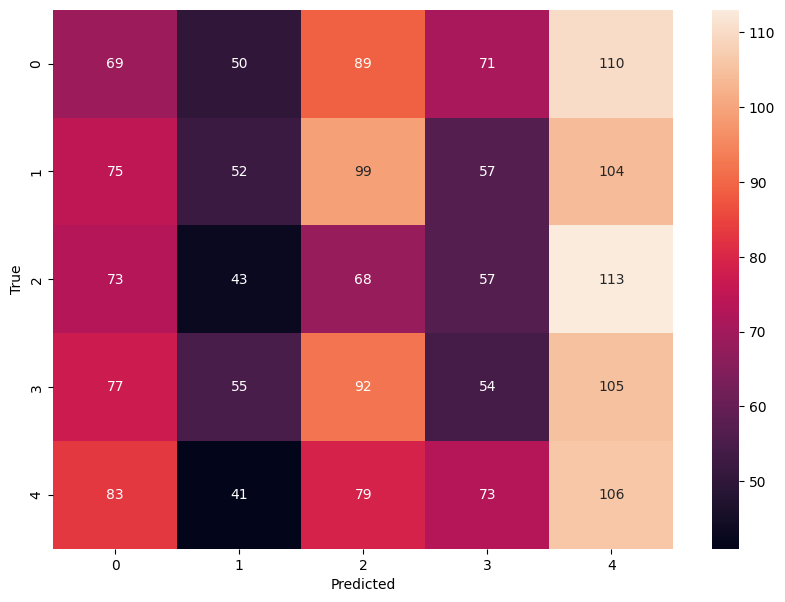

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_mms, y, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.19050132 0.20474934 0.1994723  0.18522427 0.2032735 ]
